In [30]:
from urllib import request
url = "https://raw.githubusercontent.com/kungfumas/stbi/refs/heads/master/dataintent.json"
request.urlretrieve(url, "dataintent.json")

('dataintent.json', <http.client.HTTPMessage at 0x2950d910bb0>)

In [31]:
import json

# Load the JSON data from the downloaded file
with open("dataintent.json", "r") as file:
	data = json.load(file)

print(data)

{'intents': [{'tag': 'greeting', 'patterns': ['hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'sis', 'kawan'], 'responses': ['Hai! Kadekbot di sini. Mau tau informasi tentang apa nih?', 'Halo! Saya Kadekbot, salam kenal ya! Mau tau tentang kampus merdeka, kan?', 'Helo! Ini Kadekbot. Lagi kepo tentang kampus merdeka ya?']}, {'tag': 'kadekbot', 'patterns': ['Apa itu KadekBot?', 'Siapa KadekBot?'], 'responses': ['KadekBot adalah aplikasi chatbot informasi tentang Kampus Merdeka yang dimulai dari pelaksanaan, persyaratan dan program yang berada di Kampus Merdeka!', 'KadekBot itu adalah teman informasi kamu tentang Kampus Merdeka!']}, {'tag': 'pencipta_kadekbot', 'patterns': ['Siapa pembuatmu?', 'Kadek, yang buat kamu siapa sih?', 'Siapa penciptamu, Kadek?'], 'responses': ['KadekBot diciptakan oleh mahasiswa dan mahasiswi dari program Kampus Merdeka yang memiliki ide kreatif dan semangat team yang luar biasa walaupun banyak rintang

In [32]:
# %pip install nltk
# %pip install tensorflow
# %pip install matplotlib
# %pip install pandas
# %pip install gtts
# %pip install sklearn
# %pip install scikit-learn
# %pip install pydot
# %pip install graphviz
# %pip install keras
# %pip -q install speechrecognition
# %pip -q install gtts
# %pip install pydot

In [33]:
import time
import random
import string
import pickle
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt
from gtts import gTTS
from io import BytesIO
import IPython.display as ipd
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

In [34]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
with open('dataintent.json') as content:
    data1 = json.load(content)

tags = []
inputs = []
responses = {}
words = []
classes = []
documents = []
ignore_words = ['?', '!']
for intent in data1['intents']:
    responses[intent['tag']] = intent['responses']
    for lines in intent['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])
        for pattern in intent['patterns']:
            w = nltk.word_tokenize(pattern)
            words.extend(w)
            documents.append((w, intent['tag']))
            if intent['tag'] not in classes:
                classes.append(intent['tag'])

data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [36]:
data

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting
...,...,...
75,Apa itu PMMB?,penjelasan_PMMB
76,Apa saja persyaratan IISMA?,persyaratan_IISMA
77,Bagaimana periode pelaksanaan dan cara mendaft...,periode_dan_pendaftaran_PMMB
78,Apa saja manfaat apabila mengikuti PMMB?,manfaat_PMMB


In [37]:
data.head()

,patterns,tags
0,hallo,greeting
1,hai,greeting
2,halo,greeting
3,hei,greeting
4,hi,greeting


In [38]:
data.tail()

,patterns,tags
75,Apa itu PMMB?,penjelasan_PMMB
76,Apa saja persyaratan IISMA?,persyaratan_IISMA
77,Bagaimana periode pelaksanaan dan cara mendaft...,periode_dan_pendaftaran_PMMB
78,Apa saja manfaat apabila mengikuti PMMB?,manfaat_PMMB
79,Apa saja universitas yang tergabung dalam prog...,mitra_PMMB


In [39]:
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

In [40]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
word = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)

777 unique lemmatized words ['hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'si', 'kawan', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'si', 'kawan', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'si', 'kawan', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'si', 'kawan', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'si', 'kawan', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'si', 'kawan', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 'si', 'kawan', 'hallo', 'hai', 'halo', 'hei', 'hi', 'hy', 'pagi', 'morning', 'siang', 'afternoon', 'sore', 'malam', 'bro', 's

In [41]:
classes = sorted(list(set(classes)))
print(len(classes), "classes", classes)

40 classes ['goodbye', 'greeting', 'kadekbot', 'manfaat_IISMA', 'manfaat_PMMB', 'manfaat_kampus_mengajar', 'manfaat_magang', 'manfaat_pejuang_muda', 'manfaat_pertukaran_mahasiswa', 'manfaat_studi_independen', 'mitra_IISMA', 'mitra_PMMB', 'mitra_magang', 'mitra_studi_independen', 'pencipta_kadekbot', 'penjelasan_IISMA', 'penjelasan_PMMB', 'penjelasan_kampus_mengajar', 'penjelasan_kampus_merdeka', 'penjelasan_magang', 'penjelasan_pejuang_muda', 'penjelasan_pertukaran_mahasiswa', 'penjelasan_studi_independen', 'periode_dan_pendaftaran_IISMA', 'periode_dan_pendaftaran_PMMB', 'periode_dan_pendaftaran_kampus_mengajar', 'periode_dan_pendaftaran_magang', 'periode_dan_pendaftaran_pejuang_muda', 'periode_dan_pendaftaran_pertukaran_mahasiswa', 'periode_dan_pendaftaran_studi_independen', 'persyaratan_IISMA', 'persyaratan_kampus_mengajar', 'persyaratan_kampus_merdeka', 'persyaratan_magang', 'persyaratan_pejuang_muda', 'persyaratan_pertukaran_mahasiswa', 'persyaratan_studi_independen', 'program_kamp

In [42]:
print(len(documents), "documents")

438 documents


In [43]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [1, 6, 32],
 [29, 32],
 [29, 55],
 [33, 21, 56, 57, 29, 58],
 [29, 59, 33],
 [60],
 [61],
 [34],
 [62],
 [63, 34],
 [64, 65],
 [66, 67],
 [68],
 [69, 35],
 [70],
 [71, 35],
 [36, 37],
 [72],
 [36, 37, 73],
 [1, 6, 4, 5],
 [1, 74, 4, 5],
 [1, 7, 8, 4, 5],
 [1, 2, 3, 4, 5],
 [3, 4, 5, 75],
 [3, 4, 5, 76],
 [3, 4, 5, 77],
 [18, 19],
 [20],
 [4, 22],
 [9],
 [23, 24, 5],
 [25, 26],
 [27],
 [1, 6, 18, 19],
 [1, 2, 7, 18, 19],
 [10, 11, 12, 13, 14, 15, 3, 18, 19],
 [1, 2, 16, 17, 8, 18, 19],
 [1, 2, 38, 21, 30, 31, 18, 19],
 [1, 6, 20, 28],
 [1, 2, 7, 20, 28],
 [10, 11, 12, 13, 14, 15, 3, 20, 28],
 [1, 2, 16, 17, 8, 20, 28],
 [1, 2, 38, 21, 30, 31, 20, 28],
 [1, 6, 4, 22],
 [1, 2, 7, 4, 22],
 [10, 11, 12, 13, 14, 15, 3, 4, 22],
 [1, 2, 16, 17, 8, 4, 22],
 [1, 6, 9],
 [1, 2, 7, 9],
 [10, 11, 12, 13, 14, 15, 3, 9],
 [1, 2, 16, 17, 8, 9],
 [1, 2, 39, 21, 30, 31, 3, 9],
 [1, 6, 23, 24, 5],
 [

In [44]:
x_train = pad_sequences(train)
print(x_train)

[[ 0  0  0  0  0  0  0  0  0 40]
 [ 0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0 42]
 [ 0  0  0  0  0  0  0  0  0 43]
 [ 0  0  0  0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0  0  0  0 45]
 [ 0  0  0  0  0  0  0  0  0 46]
 [ 0  0  0  0  0  0  0  0  0 47]
 [ 0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0 49]
 [ 0  0  0  0  0  0  0  0  0 50]
 [ 0  0  0  0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0  0  0  0 52]
 [ 0  0  0  0  0  0  0  0  0 53]
 [ 0  0  0  0  0  0  0  0  0 54]
 [ 0  0  0  0  0  0  0  1  6 32]
 [ 0  0  0  0  0  0  0  0 29 32]
 [ 0  0  0  0  0  0  0  0 29 55]
 [ 0  0  0  0 33 21 56 57 29 58]
 [ 0  0  0  0  0  0  0 29 59 33]
 [ 0  0  0  0  0  0  0  0  0 60]
 [ 0  0  0  0  0  0  0  0  0 61]
 [ 0  0  0  0  0  0  0  0  0 34]
 [ 0  0  0  0  0  0  0  0  0 62]
 [ 0  0  0  0  0  0  0  0 63 34]
 [ 0  0  0  0  0  0  0  0 64 65]
 [ 0  0  0  0  0  0  0  0 66 67]
 [ 0  0  0  0  0  0  0  0  0 68]
 [ 0  0  0  0  0  0  0  0 69 35]
 [ 0  0  0  0  0  0  0  0  0 70]
 [ 0  0  0

In [45]:
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2 14 14 14  0  0  0  0
  0  0  0  0  0 38 38 38 38 38 18 39 32 37 37 37 37 37 37 37 37 37 37 37
 22 36 29  9 13 19 33 26  6 12 17 31 25  5 15 30 23  3 10 21 35 28  8 20
 34 27  7 16 30 24  4 11]


In [46]:
input_shape = x_train.shape[1]
print(input_shape)

10


In [47]:
vocabulary = len(tokenizer.word_index)
print("number of unique words: ", vocabulary)

output_length = le.classes_.shape[0]
print("ouput length: ", output_length)

number of unique words:  77
ouput length:  40


In [48]:
pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

In [49]:
pickle.dump(le, open('le.pkl', 'wb'))
pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [50]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10, return_sequences=True, recurrent_dropout=0.2)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

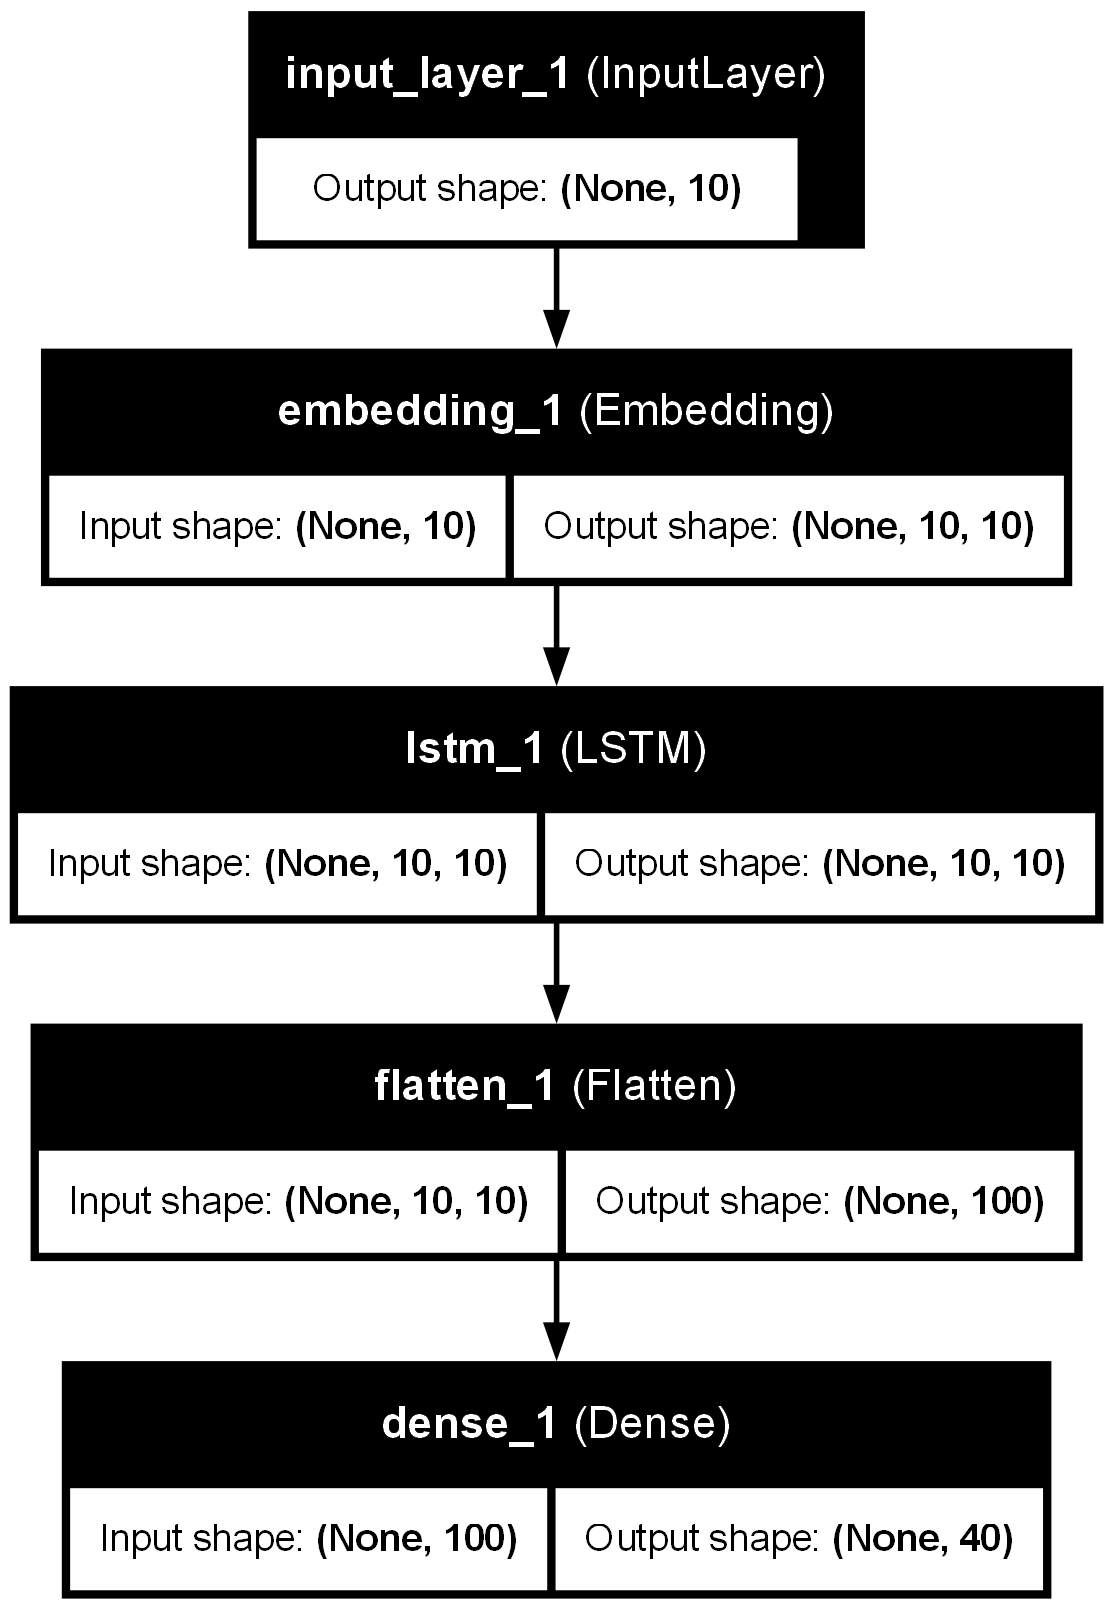

In [51]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [52]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 10, 10)         │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 10)         │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         4,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,660 (22.11 KB)

 Trainable params: 5,660 (22.11 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compile the model with a valid loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
train = model.fit(x_train, y_train, epochs=450)

Epoch 1/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0000e+00 - loss: 3.6937
Epoch 2/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0063 - loss: 3.6855    
Epoch 3/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0773 - loss: 3.6770
Epoch 4/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1664 - loss: 3.6696
Epoch 5/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1391 - loss: 3.6613
Epoch 6/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1352 - loss: 3.6544
Epoch 7/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1430 - loss: 3.6375
Epoch 8/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1195 - loss: 3.6244
Epoch 9/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1430 - loss: 3.5954
Epoch 10/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1508 - loss: 3.5648
Epoch 11/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1352 - loss: 3.5334
Epoch 12/450
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1

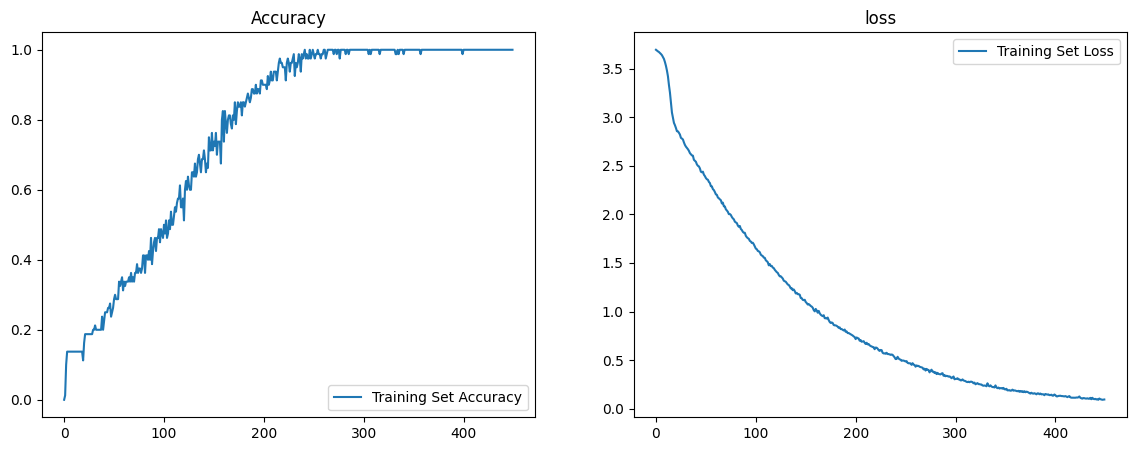

In [54]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.show()

In [56]:
while True:
    texts_p = []
    prediction_input = input('Kamu: ')

    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)

    output = model.predict(prediction_input)
    output = output.argmax()

    response_tag = le.inverse_transform([output])[0]
    print('Tesbot: ', random.choice(responses[response_tag]))
    tts = gTTS(random.choice(responses[response_tag]), lang='id')
    tts.save('tesbot.wav')
    time.sleep(0.08)
    ipd.display(ipd.Audio('tesbot.wav', autoplay=False))
    print("="*60 + "\n")
    if response_tag == "goodbye":
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Tesbot:  Mau tau tentang apa nih?



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Tesbot:  Mau tau tentang apa nih?



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Tesbot:  Mau tau tentang apa nih?



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Tesbot:  Kampus Merdeka merupakan kebijakan Menteri Pendidikan dan Kebudayaan Nadiem Makarim yang membebaskan mahasiswa untuk mengikuti kegiatan di luar program studinya selama 1 semester atau setara 20 sks dan paling lama 2 semester atau setara 40 sks.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Tesbot:  Hai! Kadekbot di sini. Mau tau informasi tentang apa nih?



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Tesbot:  Hai! Kadekbot di sini. Mau tau informasi tentang apa nih?



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Tesbot:  Helo! Ini Kadekbot. Lagi kepo tentang kampus merdeka ya?



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Tesbot:  Helo! Ini Kadekbot. Lagi kepo tentang kampus merdeka ya?



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Tesbot:  Halo! Saya Kadekbot, salam kenal ya! Mau tau tentang kampus merdeka, kan?


KeyboardInterrupt: Interrupted by user

In [58]:
model.save('chat_model.h5')
print('Model Created Successfully!')


Model Created Successfully!
